In [ ]:
print('hello')

hello


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!chmod 600 /content/kaggle.json

chmod: cannot access '/content/kaggle.json': No such file or directory


In [ ]:
!kaggle competitions download -c iris-recruitment-2025

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!pip install patool pyunpack

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 5.5 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [ ]:
from pyunpack import Archive
zip_file_path = '/content/iris-recruitment-2025.zip'
extract_directory = '/content/drive/MyDrive/Test_dataset'
# Buka dan ekstrak file ZIP menggunakan patool
Archive(zip_file_path).extractall(extract_directory)

# Output pesan jika ekstraksi selesai
print("Ekstraksi selesai.")

ModuleNotFoundError: No module named 'pyunpack'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Test_dataset/train.csv')

In [ ]:
train_df.head()

,id,customer_state,customer_account_duration,customer_area_code,has_international_plan,has_voice_mail_plan,voice_mail_message_count,daytime_total_minutes,daytime_total_calls,daytime_total_charges,evening_total_minutes,evening_total_calls,evening_total_charges,nighttime_total_minutes,nighttime_total_calls,nighttime_total_charges,intl_total_minutes,intl_total_calls,intl_total_charges,customer_service_call_count,churn
0,1,MN,117.0,408,NaN,True,21.0,538.3,112.0,80.87,257.7,110.0,20.57,136.9,85.0,5.59,11.9,7.0,NaN,NaN,0
1,2,NH,78.0,area_code_408,False,True,28.0,138.0,109.0,NaN,172.6,99.0,13.71,192.4,106.0,NaN,10.4,3.0,2.81,3.0,0
2,3,RI,89.0,415,no,True,24.0,NaN,98.0,110.48,348.1,67.0,32.82,NaN,126.0,10.56,5.9,2.0,1.59,NaN,0
3,4,PA,84.0,area_code_415,false,False,NaN,113.5,114.0,18.89,NaN,113.0,20.04,276.7,NaN,12.56,9.6,4.0,2.59,0.0,0
4,5,OR,NaN,area_code_408,false,False,0.0,87.1,76.0,14.16,253.2,111.0,NaN,333.0,125.0,14.26,NaN,5.0,NaN,1.0,0


In [ ]:
train_df.ndim

2

In [ ]:
print(train_df.shape)

(2975, 21)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2975 entries, 0 to 2974
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2975 non-null   int64  
 1   customer_state               2975 non-null   object 
 2   customer_account_duration    2395 non-null   float64
 3   customer_area_code           2389 non-null   object 
 4   has_international_plan       2521 non-null   object 
 5   has_voice_mail_plan          2653 non-null   object 
 6   voice_mail_message_count     2227 non-null   float64
 7   daytime_total_minutes        2095 non-null   float64
 8   daytime_total_calls          2522 non-null   float64
 9   daytime_total_charges        2671 non-null   float64
 10  evening_total_minutes        2129 non-null   float64
 11  evening_total_calls          2536 non-null   float64
 12  evening_total_charges        2339 non-null   float64
 13  nighttime_total_mi

<Axes: >

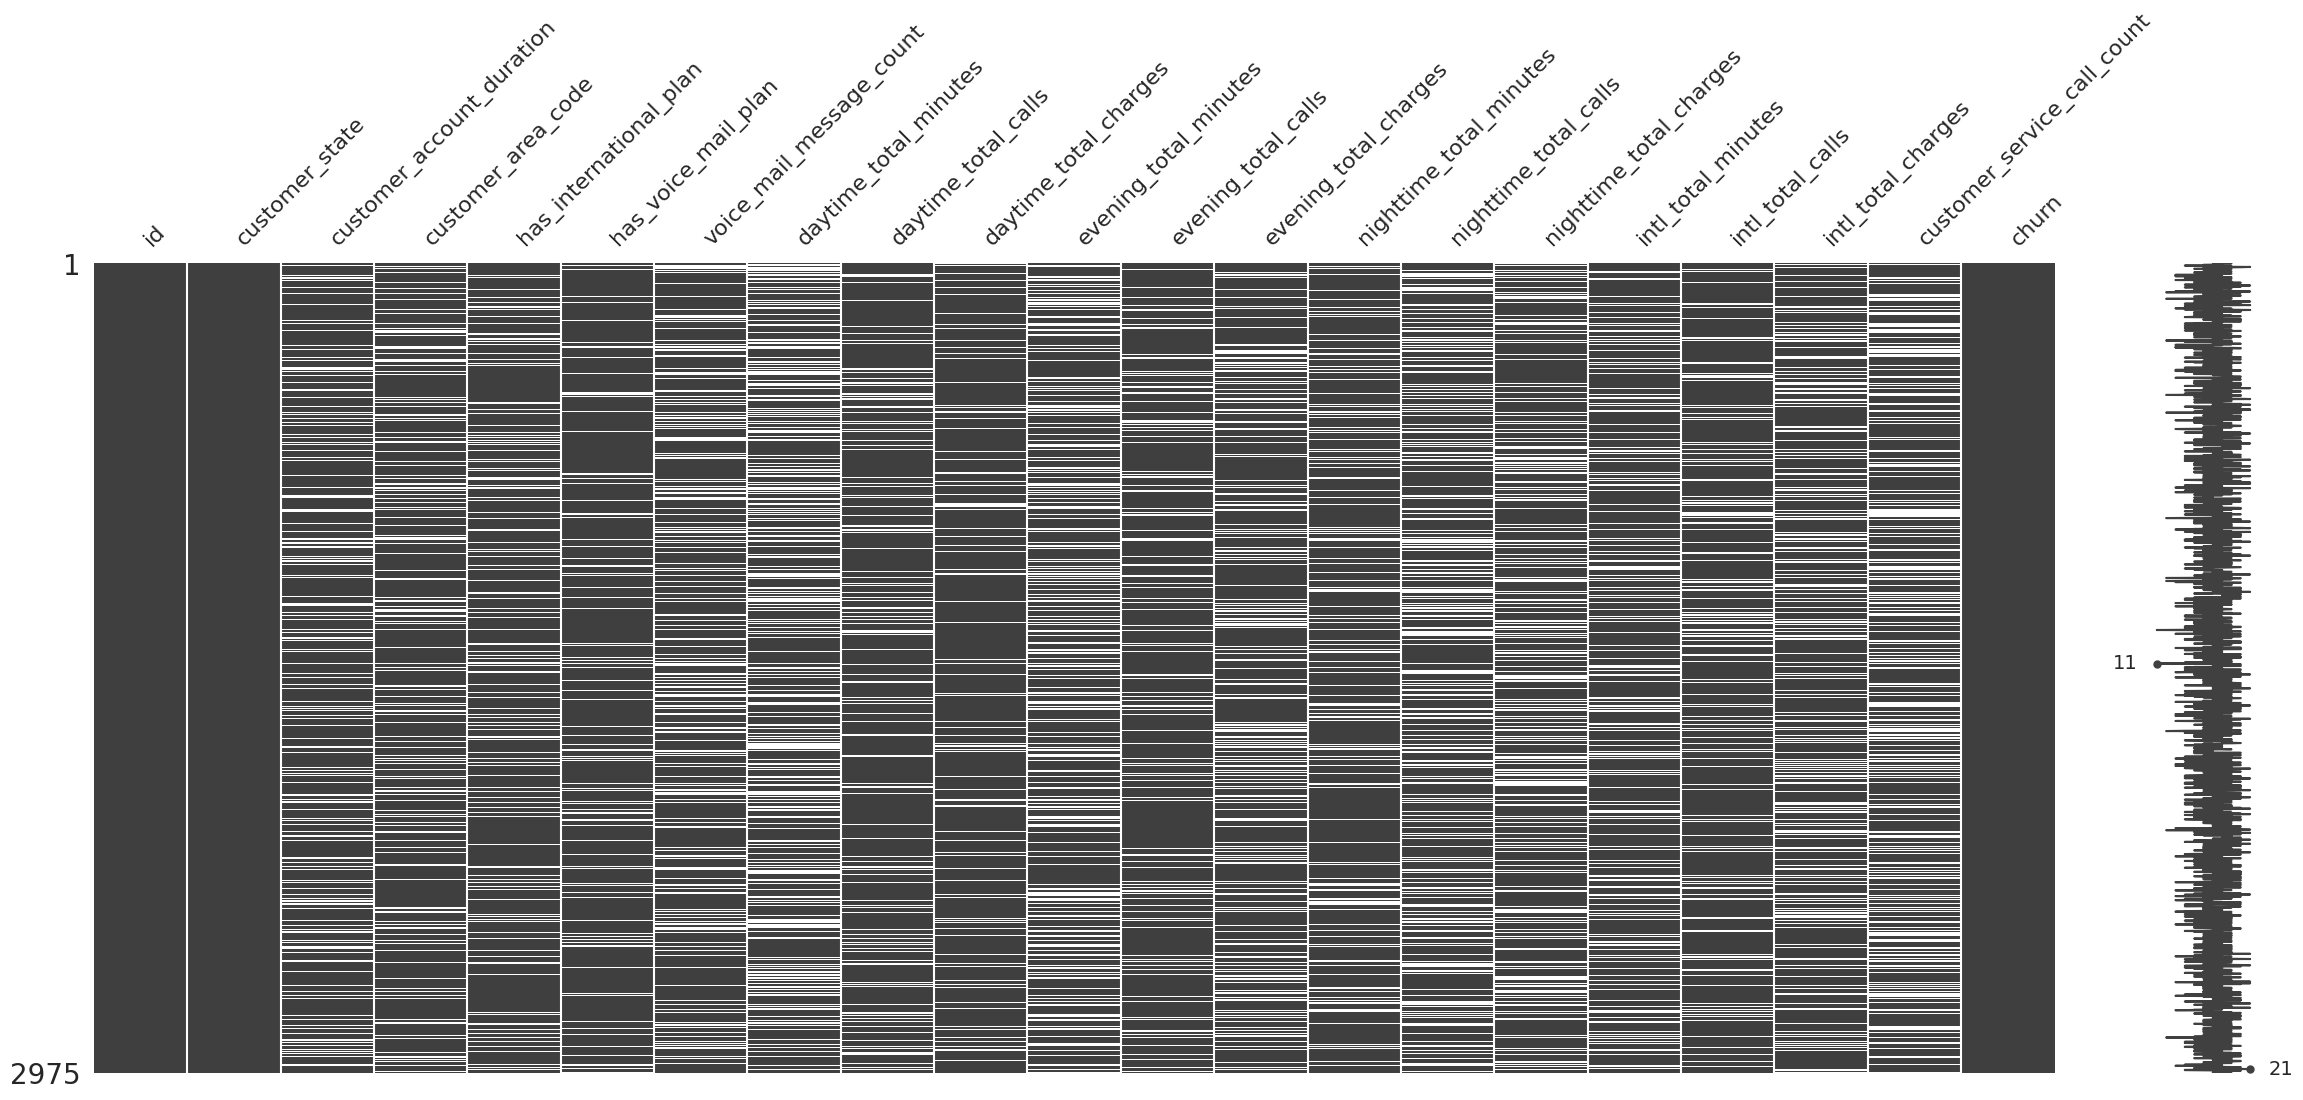

In [ ]:
# Check if values are Missing Completely at Random (MCAR)
import missingno as msno
msno.matrix(train_df)  # Visualize missing value patterns

<Axes: >

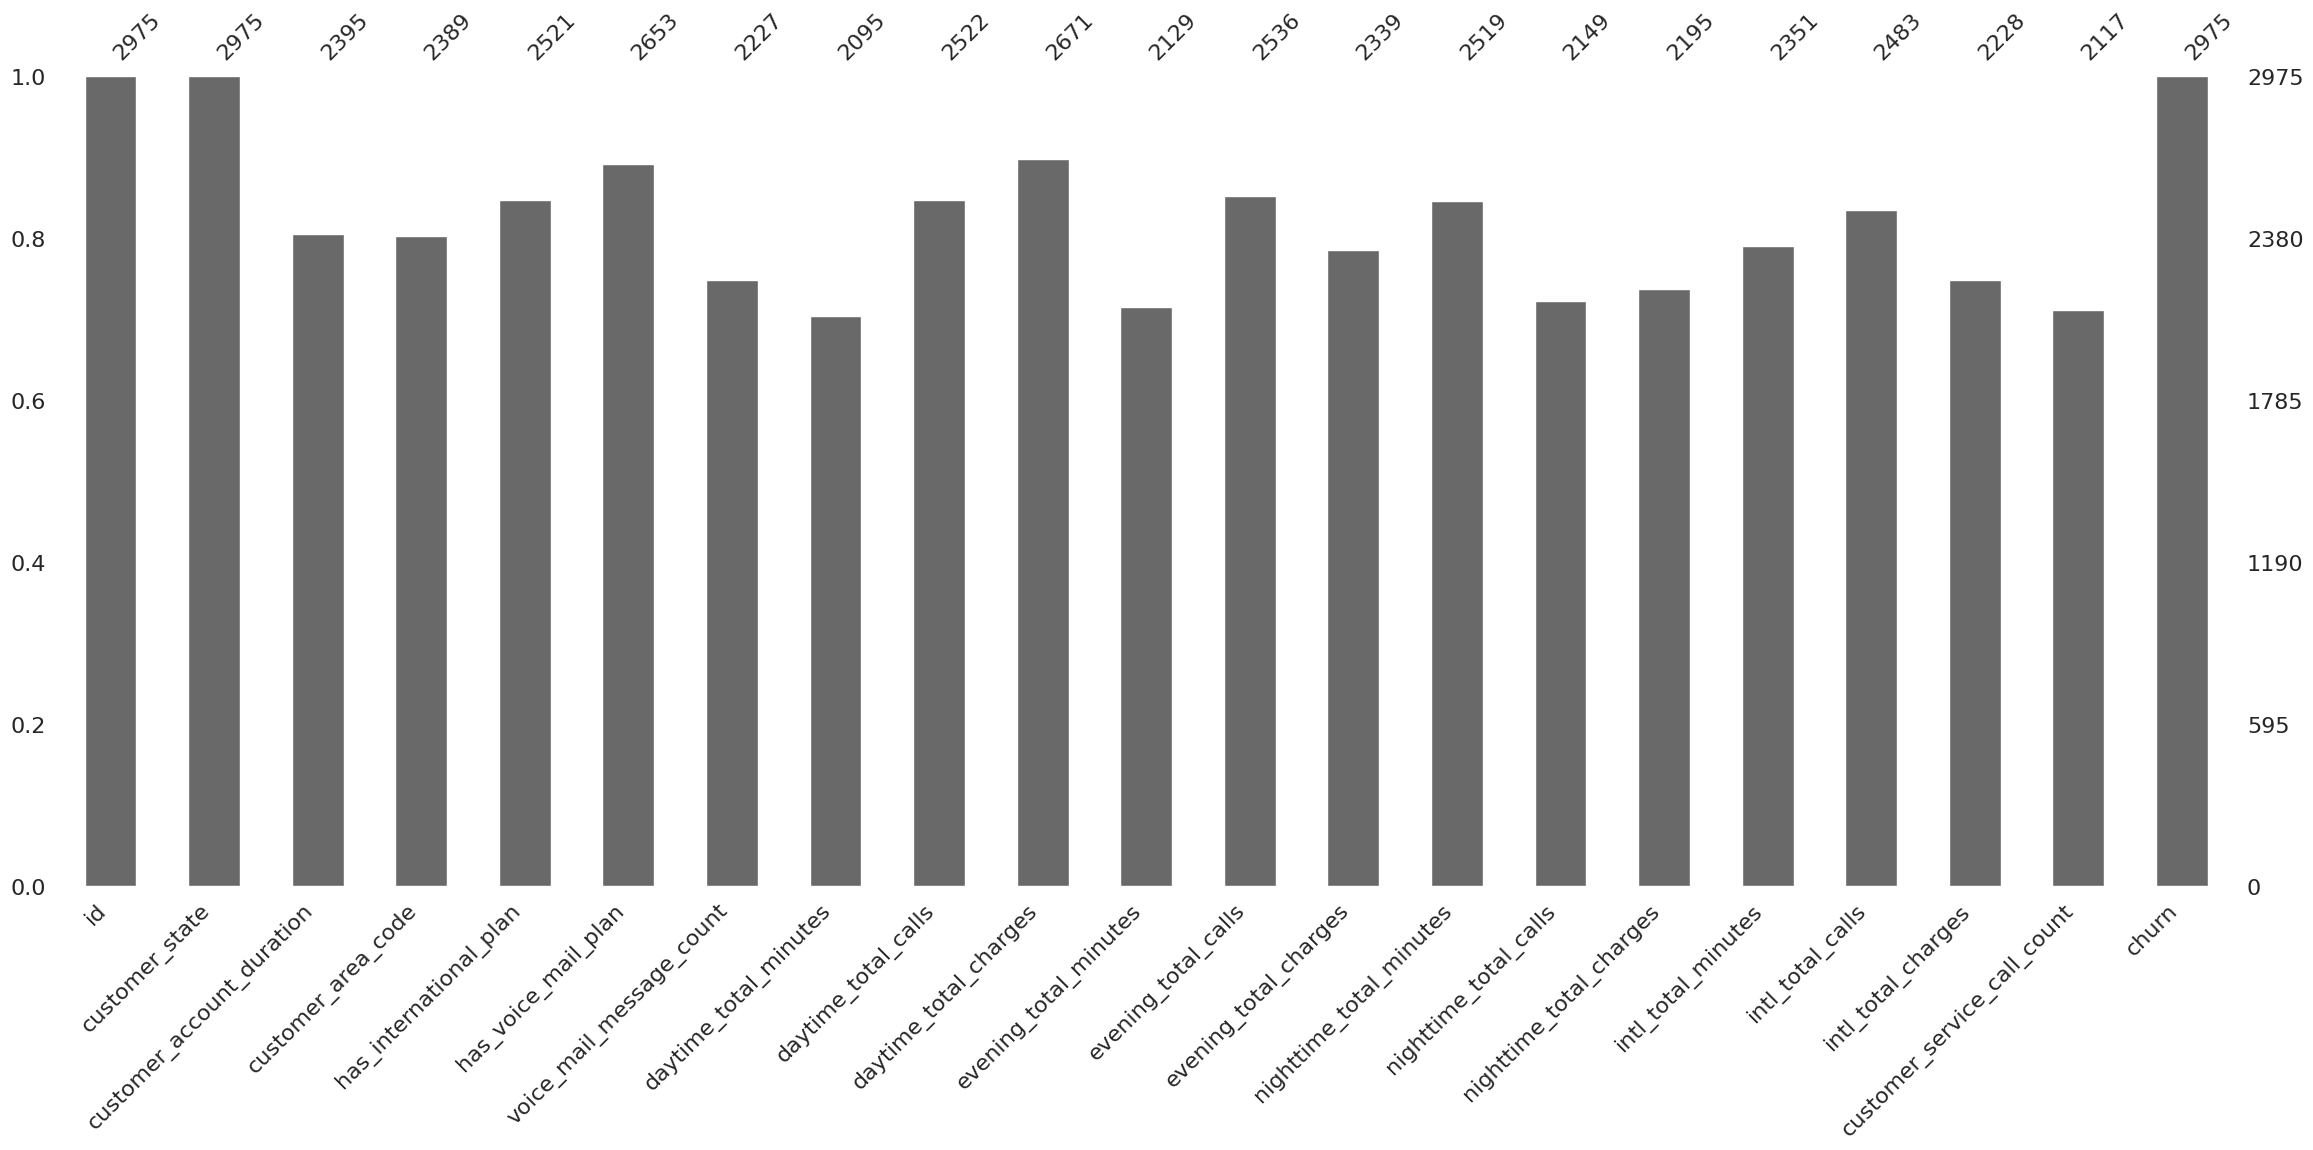

In [ ]:
msno.bar(train_df)

In [ ]:
print(train_df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
2970    False
2971    False
2972    False
2973    False
2974    False
Length: 2975, dtype: bool


In [ ]:
train_df.drop_duplicates(inplace = True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2975 entries, 0 to 2974
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2975 non-null   int64  
 1   customer_state               2975 non-null   object 
 2   customer_account_duration    2395 non-null   float64
 3   customer_area_code           2389 non-null   object 
 4   has_international_plan       2521 non-null   object 
 5   has_voice_mail_plan          2653 non-null   object 
 6   voice_mail_message_count     2227 non-null   float64
 7   daytime_total_minutes        2095 non-null   float64
 8   daytime_total_calls          2522 non-null   float64
 9   daytime_total_charges        2671 non-null   float64
 10  evening_total_minutes        2129 non-null   float64
 11  evening_total_calls          2536 non-null   float64
 12  evening_total_charges        2339 non-null   float64
 13  nighttime_total_mi

In [ ]:
train_df['customer_state'].unique()

array(['MN', 'NH', 'RI', 'PA', 'OR', 'UNKNOWN', 'SC', 'KS', 'NC', 'ID',
       'MD', 'IL', 'CO', 'VA', 'WY', 'LA', 'AL', 'AR', 'CT', 'WA', 'NY',
       'NJ', 'MT', 'IN', 'OK', 'ME', 'CA', 'HI', 'MA', 'OH', 'MS', 'MI',
       'MO', 'WV', 'TN', 'UT', 'NV', 'DE', 'WI', 'AZ', 'VT', 'FL', 'AK',
       'SD', 'NM', 'GA', 'KY', 'NE', 'DC', 'TX', 'IA', 'ND'], dtype=object)

In [ ]:
train_df['customer_area_code'].unique()

array(['408', 'area_code_408', '415', 'area_code_415', nan,
       'area_code_510', 'area_415', '510', 'area_510', 'area_408'],
      dtype=object)

In [ ]:
def clean_customer_area_code(val):
  if(val == 'area_code_408' or val == 'area_408'):
    return '408'
  elif(val == 'area_code_415' or val == 'area_415'):
    return '415'
  elif(val == 'area_code_510' or val == 'area_510'):
    return '510'
  else:
    return val

train_df['customer_area_code'] = train_df['customer_area_code'].apply(clean_customer_area_code)
train_df['customer_area_code'].head()

,customer_area_code
0,408
1,408
2,415
3,415
4,408


In [ ]:
train_df['customer_area_code'].unique()

array(['408', '415', nan, '510'], dtype=object)

In [ ]:
train_df['has_international_plan'].unique()

array([nan, 'False', 'no', 'false', 'Yes', '0', '1', 'No', 'FALSE',
       'True', 'NO', 'TRUE', 'true', 'YES', 'yes'], dtype=object)

In [ ]:
def clean_has_international_plan(val):
  if(val=='False' or val == 'no' or val == 'false' or val == '0' or val == 'No' or val == 'FALSE' or val == 'NO'):
    return False
  elif(val == 'Yes' or val == '1' or val == 'True' or val == 'TRUE' or val == 'true' or val == 'YES' or val == 'yes'):
    return True
  else:
    return val

train_df['has_international_plan'] = train_df['has_international_plan'].apply(clean_has_international_plan)
train_df['has_international_plan'].head()

,has_international_plan
0,NaN
1,False
2,False
3,False
4,False


In [ ]:
train_df['has_international_plan'].unique()

array([nan, False, True], dtype=object)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2975 entries, 0 to 2974
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2975 non-null   int64  
 1   customer_state               2975 non-null   object 
 2   customer_account_duration    2395 non-null   float64
 3   customer_area_code           2389 non-null   object 
 4   has_international_plan       2521 non-null   object 
 5   has_voice_mail_plan          2653 non-null   object 
 6   voice_mail_message_count     2227 non-null   float64
 7   daytime_total_minutes        2095 non-null   float64
 8   daytime_total_calls          2522 non-null   float64
 9   daytime_total_charges        2671 non-null   float64
 10  evening_total_minutes        2129 non-null   float64
 11  evening_total_calls          2536 non-null   float64
 12  evening_total_charges        2339 non-null   float64
 13  nighttime_total_mi

In [ ]:
train_df['customer_state'].unique()

array(['MN', 'NH', 'RI', 'PA', 'OR', 'UNKNOWN', 'SC', 'KS', 'NC', 'ID',
       'MD', 'IL', 'CO', 'VA', 'WY', 'LA', 'AL', 'AR', 'CT', 'WA', 'NY',
       'NJ', 'MT', 'IN', 'OK', 'ME', 'CA', 'HI', 'MA', 'OH', 'MS', 'MI',
       'MO', 'WV', 'TN', 'UT', 'NV', 'DE', 'WI', 'AZ', 'VT', 'FL', 'AK',
       'SD', 'NM', 'GA', 'KY', 'NE', 'DC', 'TX', 'IA', 'ND'], dtype=object)

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def impute_numerical_columns(df):
    """
    Perform MICE imputation only on numerical columns.

    Parameters:
    df (pandas.DataFrame): Input DataFrame with missing values
    """
    # Get only numerical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Initialize MICE imputer
    imputer = IterativeImputer(
        max_iter=10,
        random_state=42,
        initial_strategy='median',
        min_value=0
    )

    # Perform imputation only on numerical columns
    imputed_data = imputer.fit_transform(df[numerical_cols])

    # Update the original DataFrame with imputed values
    for i, col in enumerate(numerical_cols):
        df[col] = imputed_data[:, i]

        # Round integer columns
        if df[col].dtype == 'int64':
            df[col] = np.round(df[col]).astype('int64')

In [ ]:
# This will modify your DataFrame in-place
impute_numerical_columns(train_df)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

def impute_categorical_with_regression(df):
    """
    Impute categorical columns using Linear Regression, with special handling for area_code.

    Parameters:
    df (pandas.DataFrame): Input DataFrame with missing values
    """
    # Create a copy to avoid modifying the original dataframe
    df = df.copy()

    # Get categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Special handling for area_code
    area_code_mapping = {'408': 0, '415': 1, '510': 2}
    non_null_mask = df['customer_area_code'].notna()
    df.loc[non_null_mask, 'customer_area_code'] = df.loc[non_null_mask, 'customer_area_code'].map(area_code_mapping)
    df['customer_area_code'] = df['customer_area_code'].astype(float)

    # Handle other categorical columns with LabelEncoder
    other_cat_cols = [col for col in categorical_cols if col != 'customer_area_code']
    encoders = {}

    for col in other_cat_cols:
        le = LabelEncoder()
        # Get non-null values and fit
        non_null_mask = df[col].notna()
        non_null_data = df.loc[non_null_mask, col]
        le.fit(non_null_data)

        # Transform non-null values
        df.loc[non_null_mask, col] = le.transform(non_null_data)
        df[col] = df[col].astype(float)
        encoders[col] = le

    # Combine all categorical columns for imputation
    cols_to_impute = list(other_cat_cols) + ['customer_area_code']

    # Initialize a simple imputer for numerical columns
    num_imputer = SimpleImputer(strategy='mean')

    # For each column with missing values, train a regression model
    for column in cols_to_impute:
        # Identify rows with missing and non-missing values
        train_mask = df[column].notna()
        missing_mask = df[column].isna()

        if missing_mask.sum() > 0:  # Only proceed if there are missing values
            # Prepare features (use all other columns except the target)
            feature_cols = [col for col in df.columns if col != column]

            # Create and fit the model on non-missing values
            model = LinearRegression()

            # Get features for training
            train_features = df.loc[train_mask, feature_cols].copy()

            # Impute NaN values in features using mean strategy
            train_features = pd.DataFrame(
                num_imputer.fit_transform(train_features),
                columns=feature_cols,
                index=train_features.index
            )

            train_target = df.loc[train_mask, column]

            # Fit the model
            model.fit(train_features, train_target)

            # Prepare features for prediction
            missing_features = df.loc[missing_mask, feature_cols].copy()

            # Impute NaN values in features for prediction
            missing_features = pd.DataFrame(
                num_imputer.transform(missing_features),
                columns=feature_cols,
                index=missing_features.index
            )

            # Predict missing values
            predicted_values = model.predict(missing_features)

            # Round predictions since these are categorical
            predicted_values = np.round(predicted_values)

            # Ensure predictions are within valid range
            if column == 'customer_area_code':
                predicted_values = np.clip(predicted_values, 0, 2)
            else:
                le = encoders[column]
                predicted_values = np.clip(predicted_values, 0, len(le.classes_) - 1)

            # Assign predicted values
            df.loc[missing_mask, column] = predicted_values

    # Convert back to original format
    for column in cols_to_impute:
        df[column] = df[column].astype(int)
        if column == 'customer_area_code':
            # Reverse mapping for area codes
            reverse_mapping = {0: '408', 1: '415', 2: '510'}
            df[column] = df[column].map(reverse_mapping)
        else:
            # Reverse transform other categorical columns
            le = encoders[column]
            df[column] = le.inverse_transform(df[column].astype(int))

    return df

# Usage example:
# imputed_df = impute_categorical_with_regression(train_df)

In [ ]:
imputed__train_df = impute_categorical_with_regression(train_df)

In [ ]:
# List of states (or categories)
states = ['MN', 'NH', 'RI', 'PA', 'OR', 'UNKNOWN', 'SC', 'KS', 'NC', 'ID',
          'MD', 'IL', 'CO', 'VA', 'WY', 'LA', 'AL', 'AR', 'CT', 'WA', 'NY',
          'NJ', 'MT', 'IN', 'OK', 'ME', 'CA', 'HI', 'MA', 'OH', 'MS', 'MI',
          'MO', 'WV', 'TN', 'UT', 'NV', 'DE', 'WI', 'AZ', 'VT', 'FL', 'AK',
          'SD', 'NM', 'GA', 'KY', 'NE', 'DC', 'TX', 'IA', 'ND']

# Create a mapping (dictionary) to manually encode states to numbers
state_to_num = {state: idx for idx, state in enumerate(states)}

# Apply the mapping to the 'state' column
imputed__train_df['customer_state'] = imputed__train_df['customer_state'].map(state_to_num)

In [ ]:
imputed__train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2975 entries, 0 to 2974
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2975 non-null   float64
 1   customer_state               2975 non-null   int64  
 2   customer_account_duration    2975 non-null   float64
 3   customer_area_code           2975 non-null   object 
 4   has_international_plan       2975 non-null   object 
 5   has_voice_mail_plan          2975 non-null   object 
 6   voice_mail_message_count     2975 non-null   float64
 7   daytime_total_minutes        2975 non-null   float64
 8   daytime_total_calls          2975 non-null   float64
 9   daytime_total_charges        2975 non-null   float64
 10  evening_total_minutes        2975 non-null   float64
 11  evening_total_calls          2975 non-null   float64
 12  evening_total_charges        2975 non-null   float64
 13  nighttime_total_mi

In [ ]:
train_df['customer_area_code'].unique()

array(['408', '415', nan, '510'], dtype=object)

In [ ]:
imputed__train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2975 entries, 0 to 2974
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2975 non-null   float64
 1   customer_state               2975 non-null   int64  
 2   customer_account_duration    2975 non-null   float64
 3   customer_area_code           2975 non-null   object 
 4   has_international_plan       2975 non-null   object 
 5   has_voice_mail_plan          2975 non-null   object 
 6   voice_mail_message_count     2975 non-null   float64
 7   daytime_total_minutes        2975 non-null   float64
 8   daytime_total_calls          2975 non-null   float64
 9   daytime_total_charges        2975 non-null   float64
 10  evening_total_minutes        2975 non-null   float64
 11  evening_total_calls          2975 non-null   float64
 12  evening_total_charges        2975 non-null   float64
 13  nighttime_total_mi

In [ ]:
# List of states (or categories)
states = ['408','415','510']

# Create a mapping (dictionary) to manually encode states to numbers
state_to_num = {state: idx for idx, state in enumerate(states)}

# Apply the mapping to the 'state' column
imputed__train_df['customer_area_code'] = imputed__train_df['customer_area_code'].map(state_to_num)

In [ ]:
train_df['customer_area_code'].unique()

array(['408', '415', nan, '510'], dtype=object)

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np


# Step 1: Encode Categorical Column
train_df['customer_area_code_encoded'], uniques = train_df['customer_area_code'].factorize()

# Replace -1 (factorize missing values) with NaN for KNNImputer
train_df['customer_area_code_encoded'] = train_df['customer_area_code_encoded'].replace(-1, np.nan)

# Step 2: Apply KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
train_df['customer_area_code_encoded'] = knn_imputer.fit_transform(
    train_df[['customer_area_code_encoded']]
)

# Step 3: Round Imputed Values to Integers (since categories are discrete)
train_df['customer_area_code_encoded'] = train_df['customer_area_code_encoded'].round().astype(int)

# Step 4: Decode Imputed Values Back to Original Categories
train_df['customer_area_code'] = train_df['customer_area_code_encoded'].map(
    dict(enumerate(uniques))
)

# Drop the encoded column if no longer needed
train_df.drop(columns='customer_area_code_encoded', inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2975 entries, 0 to 2974
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2975 non-null   float64
 1   customer_state               2975 non-null   int64  
 2   customer_account_duration    2975 non-null   float64
 3   customer_area_code           2389 non-null   float64
 4   has_international_plan       2521 non-null   object 
 5   has_voice_mail_plan          2653 non-null   object 
 6   voice_mail_message_count     2975 non-null   float64
 7   daytime_total_minutes        2975 non-null   float64
 8   daytime_total_calls          2975 non-null   float64
 9   daytime_total_charges        2975 non-null   float64
 10  evening_total_minutes        2975 non-null   float64
 11  evening_total_calls          2975 non-null   float64
 12  evening_total_charges        2975 non-null   float64
 13  nighttime_total_mi

In [ ]:
train_df['customer_area_code'].unique()

array([ 0.,  1., nan,  2.])

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np


# Step 1: Encode Categorical Column
train_df['has_international_plan_encoded'], uniques = train_df['has_international_plan'].factorize()

# Replace -1 (factorize missing values) with NaN for KNNImputer
train_df['has_international_plan_encoded'] = train_df['has_international_plan_encoded'].replace(-1, np.nan)

# Step 2: Apply KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
train_df['has_international_plan_encoded'] = knn_imputer.fit_transform(
    train_df[['has_international_plan_encoded']]
)

# Step 3: Round Imputed Values to Integers (since categories are discrete)
train_df['has_international_plan_encoded'] = train_df['has_international_plan_encoded'].round().astype(int)

# Step 4: Decode Imputed Values Back to Original Categories
train_df['has_international_plan'] = train_df['has_international_plan_encoded'].map(
    dict(enumerate(uniques))
)

# Drop the encoded column if no longer needed
train_df.drop(columns='has_international_plan_encoded', inplace=True)

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np


# Step 1: Encode Categorical Column
train_df['has_voice_mail_plan_encoded'], uniques = train_df['has_voice_mail_plan'].factorize()

# Replace -1 (factorize missing values) with NaN for KNNImputer
train_df['has_voice_mail_plan_encoded'] = train_df['has_voice_mail_plan_encoded'].replace(-1, np.nan)

# Step 2: Apply KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
train_df['has_voice_mail_plan_encoded'] = knn_imputer.fit_transform(
    train_df[['has_voice_mail_plan_encoded']]
)

# Step 3: Round Imputed Values to Integers (since categories are discrete)
train_df['has_voice_mail_plan_encoded'] = train_df['has_voice_mail_plan_encoded'].round().astype(int)

# Step 4: Decode Imputed Values Back to Original Categories
train_df['has_voice_mail_plan'] = train_df['has_voice_mail_plan_encoded'].map(
    dict(enumerate(uniques))
)

# Drop the encoded column if no longer needed
train_df.drop(columns='has_voice_mail_plan_encoded', inplace=True)

In [ ]:
# List of states (or categories)
states = ['408','415','510']

# Create a mapping (dictionary) to manually encode states to numbers
state_to_num = {state: idx for idx, state in enumerate(states)}

# Apply the mapping to the 'state' column
train_df['customer_area_code'] = train_df['customer_area_code'].map(state_to_num)

In [ ]:
imputed__train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2975 entries, 0 to 2974
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2975 non-null   float64
 1   customer_state               2975 non-null   int64  
 2   customer_account_duration    2975 non-null   float64
 3   customer_area_code           2975 non-null   int64  
 4   has_international_plan       2975 non-null   object 
 5   has_voice_mail_plan          2975 non-null   object 
 6   voice_mail_message_count     2975 non-null   float64
 7   daytime_total_minutes        2975 non-null   float64
 8   daytime_total_calls          2975 non-null   float64
 9   daytime_total_charges        2975 non-null   float64
 10  evening_total_minutes        2975 non-null   float64
 11  evening_total_calls          2975 non-null   float64
 12  evening_total_charges        2975 non-null   float64
 13  nighttime_total_mi

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'imputed__train_df' is your DataFrame
categorical_cols = imputed__train_df.select_dtypes(include=['object', 'bool']).columns
le = LabelEncoder()
for col in categorical_cols:
    imputed__train_df[col] = le.fit_transform(imputed__train_df[col])

In [ ]:
imputed__train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2975 entries, 0 to 2974
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2975 non-null   float64
 1   customer_state               2975 non-null   int64  
 2   customer_account_duration    2975 non-null   float64
 3   customer_area_code           2975 non-null   int64  
 4   has_international_plan       2975 non-null   int64  
 5   has_voice_mail_plan          2975 non-null   int64  
 6   voice_mail_message_count     2975 non-null   float64
 7   daytime_total_minutes        2975 non-null   float64
 8   daytime_total_calls          2975 non-null   float64
 9   daytime_total_charges        2975 non-null   float64
 10  evening_total_minutes        2975 non-null   float64
 11  evening_total_calls          2975 non-null   float64
 12  evening_total_charges        2975 non-null   float64
 13  nighttime_total_mi

In [ ]:
train_df['has_international_plan'].unique()

array([nan, False, True], dtype=object)

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Test_dataset/test.csv')

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1275 non-null   int64  
 1   customer_state               1275 non-null   object 
 2   customer_account_duration    1023 non-null   float64
 3   customer_area_code           1007 non-null   object 
 4   has_international_plan       1083 non-null   object 
 5   has_voice_mail_plan          1140 non-null   object 
 6   voice_mail_message_count     946 non-null    float64
 7   daytime_total_minutes        910 non-null    float64
 8   daytime_total_calls          1085 non-null   float64
 9   daytime_total_charges        1150 non-null   float64
 10  evening_total_minutes        922 non-null    float64
 11  evening_total_calls          1075 non-null   float64
 12  evening_total_charges        984 non-null    float64
 13  nighttime_total_mi

In [ ]:
def clean_customer_area_code(val):
  if(val == 'area_code_408' or val == 'area_408'):
    return '408'
  elif(val == 'area_code_415' or val == 'area_415'):
    return '415'
  elif(val == 'area_code_510' or val == 'area_510'):
    return '510'
  else:
    return val

test_df['customer_area_code'] = test_df['customer_area_code'].apply(clean_customer_area_code)
test_df['customer_area_code'].head()

,customer_area_code
0,408
1,415
2,408
3,408
4,408


In [ ]:
def clean_has_international_plan(val):
  if(val=='False' or val == 'no' or val == 'false' or val == '0' or val == 'No' or val == 'FALSE' or val == 'NO'):
    return False
  elif(val == 'Yes' or val == '1' or val == 'True' or val == 'TRUE' or val == 'true' or val == 'YES' or val == 'yes'):
    return True
  else:
    return val

test_df['has_international_plan'] = test_df['has_international_plan'].apply(clean_has_international_plan)
test_df['has_international_plan'].head()

,has_international_plan
0,False
1,False
2,False
3,NaN
4,False


In [ ]:
# List of states (or categories)
states = ['MN', 'NH', 'RI', 'PA', 'OR', 'UNKNOWN', 'SC', 'KS', 'NC', 'ID',
          'MD', 'IL', 'CO', 'VA', 'WY', 'LA', 'AL', 'AR', 'CT', 'WA', 'NY',
          'NJ', 'MT', 'IN', 'OK', 'ME', 'CA', 'HI', 'MA', 'OH', 'MS', 'MI',
          'MO', 'WV', 'TN', 'UT', 'NV', 'DE', 'WI', 'AZ', 'VT', 'FL', 'AK',
          'SD', 'NM', 'GA', 'KY', 'NE', 'DC', 'TX', 'IA', 'ND']

# Create a mapping (dictionary) to manually encode states to numbers
state_to_num = {state: idx for idx, state in enumerate(states)}

# Apply the mapping to the 'state' column
test_df['customer_state'] = test_df['customer_state'].map(state_to_num)

In [ ]:
impute_numerical_columns(test_df)

In [ ]:
imputed__test_df = impute_categorical_with_regression(test_df)

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np


# Step 1: Encode Categorical Column
test_df['customer_area_code_encoded'], uniques = test_df['customer_area_code'].factorize()

# Replace -1 (factorize missing values) with NaN for KNNImputer
test_df['customer_area_code_encoded'] = test_df['customer_area_code_encoded'].replace(-1, np.nan)

# Step 2: Apply KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
test_df['customer_area_code_encoded'] = knn_imputer.fit_transform(
    test_df[['customer_area_code_encoded']]
)

# Step 3: Round Imputed Values to Integers (since categories are discrete)
test_df['customer_area_code_encoded'] = test_df['customer_area_code_encoded'].round().astype(int)

# Step 4: Decode Imputed Values Back to Original Categories
test_df['customer_area_code'] = test_df['customer_area_code_encoded'].map(
    dict(enumerate(uniques))
)

# Drop the encoded column if no longer needed
test_df.drop(columns='customer_area_code_encoded', inplace=True)

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np


# Step 1: Encode Categorical Column
test_df['has_international_plan_encoded'], uniques = test_df['has_international_plan'].factorize()

# Replace -1 (factorize missing values) with NaN for KNNImputer
test_df['has_international_plan_encoded'] = test_df['has_international_plan_encoded'].replace(-1, np.nan)

# Step 2: Apply KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
test_df['has_international_plan_encoded'] = knn_imputer.fit_transform(
    test_df[['has_international_plan_encoded']]
)

# Step 3: Round Imputed Values to Integers (since categories are discrete)
test_df['has_international_plan_encoded'] = test_df['has_international_plan_encoded'].round().astype(int)

# Step 4: Decode Imputed Values Back to Original Categories
test_df['has_international_plan'] = test_df['has_international_plan_encoded'].map(
    dict(enumerate(uniques))
)

# Drop the encoded column if no longer needed
test_df.drop(columns='has_international_plan_encoded', inplace=True)

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np


# Step 1: Encode Categorical Column
test_df['has_voice_mail_plan_encoded'], uniques = test_df['has_voice_mail_plan'].factorize()

# Replace -1 (factorize missing values) with NaN for KNNImputer
test_df['has_voice_mail_plan_encoded'] = test_df['has_voice_mail_plan_encoded'].replace(-1, np.nan)

# Step 2: Apply KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
test_df['has_voice_mail_plan_encoded'] = knn_imputer.fit_transform(
    test_df[['has_voice_mail_plan_encoded']]
)

# Step 3: Round Imputed Values to Integers (since categories are discrete)
test_df['has_voice_mail_plan_encoded'] = test_df['has_voice_mail_plan_encoded'].round().astype(int)

# Step 4: Decode Imputed Values Back to Original Categories
test_df['has_voice_mail_plan'] = test_df['has_voice_mail_plan_encoded'].map(
    dict(enumerate(uniques))
)

# Drop the encoded column if no longer needed
test_df.drop(columns='has_voice_mail_plan_encoded', inplace=True)

In [ ]:
impute_categorical_columns(test_df)

,id,customer_state,customer_account_duration,customer_area_code,has_international_plan,has_voice_mail_plan,voice_mail_message_count,daytime_total_minutes,daytime_total_calls,daytime_total_charges,evening_total_minutes,evening_total_calls,evening_total_charges,nighttime_total_minutes,nighttime_total_calls,nighttime_total_charges,intl_total_minutes,intl_total_calls,intl_total_charges,customer_service_call_count
0,2976.0,OK,91.000000,408,False,True,8.900604,270.285750,78.000000,44.41,209.300000,98.000000,17.530000,292.600000,99.769387,12.44,9.600000,2.000000,2.590000,2.232184
1,2977.0,NJ,95.000000,415,False,True,22.000000,39.300000,126.000000,6.46,265.794087,90.000000,20.548968,269.000000,99.761699,11.06,11.900000,7.000000,3.213626,2.228930
2,2978.0,GA,73.000000,408,False,False,0.000000,157.848775,92.000000,29.13,397.200000,87.000000,34.800000,382.493815,106.000000,17.86,9.107631,4.116864,2.460000,1.000000
3,2979.0,WY,54.000000,408,False,True,39.000000,148.689689,73.000000,25.82,218.386677,117.000000,18.870000,131.300000,117.000000,6.13,12.500000,8.000000,3.380000,2.000000
4,2980.0,KS,108.000000,408,False,False,0.000000,417.200000,48.000000,79.43,196.100000,100.165644,17.961604,204.400000,84.000000,9.85,16.112507,4.213460,4.350000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,4246.0,NC,64.000000,408,False,True,19.000000,170.100000,99.145526,30.50,120.950267,92.000000,10.800000,234.300000,118.000000,10.64,7.500000,4.618799,2.025568,0.000000
1271,4247.0,UNKNOWN,63.000000,415,False,False,0.000000,144.200000,92.000000,22.77,198.600000,102.000000,16.640000,232.400000,120.000000,9.68,7.500000,2.000000,2.030000,2.068476
1272,4248.0,MN,53.000000,415,False,True,24.000000,363.789474,146.000000,59.74,218.282736,136.000000,17.220000,245.200000,99.312311,10.34,13.100000,5.000000,3.540000,2.048088
1273,4249.0,ID,92.000000,415,False,False,0.000000,171.000000,140.000000,27.69,236.890979,105.000000,19.220000,232.300000,117.000000,9.87,9.000000,5.000000,2.430000,2.053188


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1275 non-null   float64
 1   customer_state               1275 non-null   float64
 2   customer_account_duration    1275 non-null   float64
 3   customer_area_code           1275 non-null   object 
 4   has_international_plan       1275 non-null   object 
 5   has_voice_mail_plan          1275 non-null   object 
 6   voice_mail_message_count     1275 non-null   float64
 7   daytime_total_minutes        1275 non-null   float64
 8   daytime_total_calls          1275 non-null   float64
 9   daytime_total_charges        1275 non-null   float64
 10  evening_total_minutes        1275 non-null   float64
 11  evening_total_calls          1275 non-null   float64
 12  evening_total_charges        1275 non-null   float64
 13  nighttime_total_mi

In [ ]:
# List of states (or categories)
states = ['408','415','510']

# Create a mapping (dictionary) to manually encode states to numbers
state_to_num = {state: idx for idx, state in enumerate(states)}

# Apply the mapping to the 'state' column
imputed__test_df['customer_area_code'] = imputed__test_df['customer_area_code'].map(state_to_num)

In [ ]:
categorical_cols = imputed__test_df.select_dtypes(include=['object', 'bool']).columns
le = LabelEncoder()
for col in categorical_cols:
    imputed__test_df[col] = le.fit_transform(imputed__test_df[col])

In [ ]:
imputed__test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1275 non-null   float64
 1   customer_state               1275 non-null   float64
 2   customer_account_duration    1275 non-null   float64
 3   customer_area_code           1275 non-null   int64  
 4   has_international_plan       1275 non-null   int64  
 5   has_voice_mail_plan          1275 non-null   int64  
 6   voice_mail_message_count     1275 non-null   float64
 7   daytime_total_minutes        1275 non-null   float64
 8   daytime_total_calls          1275 non-null   float64
 9   daytime_total_charges        1275 non-null   float64
 10  evening_total_minutes        1275 non-null   float64
 11  evening_total_calls          1275 non-null   float64
 12  evening_total_charges        1275 non-null   float64
 13  nighttime_total_mi

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

imputed__train_df.drop(columns=['id'], inplace=True)
imputed__test_df.drop(columns=['id'], inplace=True)

# Define the feature and target variables
x_train = imputed__train_df.drop(columns=['churn'])
y_train = imputed__train_df['churn']
x_test = imputed__test_df

# Split the data into numeric and categorical columns
x_train_numeric = x_train.drop(columns=['customer_state', 'customer_area_code', 'has_international_plan', 'has_voice_mail_plan'])
x_test_numeric = x_test.drop(columns=['customer_state', 'customer_area_code', 'has_international_plan', 'has_voice_mail_plan'])

x_train_cat = x_train[['customer_state', 'customer_area_code', 'has_international_plan', 'has_voice_mail_plan']]
x_test_cat = x_test[['customer_state', 'customer_area_code', 'has_international_plan', 'has_voice_mail_plan']]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns for training data
X_train_scaled = scaler.fit_transform(x_train_numeric)
X_test_scaled = scaler.transform(x_test_numeric)

# Convert the scaled data back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=x_train_numeric.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=x_test_numeric.columns)

# Concatenate the scaled numeric data with the categorical data
X_train_final = pd.concat([X_train_scaled_df, x_train_cat], axis=1)
X_test_final = pd.concat([X_test_scaled_df, x_test_cat], axis=1)

# Show the final DataFrames
print(X_train_final.head())
print(X_test_final.head())


   customer_account_duration  voice_mail_message_count  daytime_total_minutes  \
0                   0.485710                  1.198552               3.052861   
1                  -0.614196                  1.812182              -0.775736   
2                  -0.303966                  1.461537               3.833810   
3                  -0.444980                 -0.002616              -1.010062   
4                   0.000642                 -0.642337              -1.262560   

   daytime_total_calls  daytime_total_charges  evening_total_minutes  \
0             0.664752               2.446103               0.222329   
1             0.498885              -0.838276              -0.692870   
2            -0.109296               4.103593               1.194526   
3             0.775331              -1.023376              -0.044303   
4            -1.325659              -1.288149               0.173934   

   evening_total_calls  evening_total_charges  nighttime_total_minutes  \
0     

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have X_train_final, y_train (target), X_test_final already defined

# Initialize the SVC model (you can customize the kernel and other hyperparameters)
svc_model = SVC(kernel='linear', class_weight='balanced', random_state=42)

# Train the model using the training data
svc_model.fit(X_train_final, y_train)

# Predict on the test set
y_pred = svc_model.predict(X_test_final)

# Evaluate the model
accuracy = accuracy_score(y_train, svc_model.predict(X_train_final))  # Training accuracy
print(f"Training Accuracy: {accuracy:.4f}")

# Classification report for detailed performance metrics
print("\nClassification Report on Training Data:")
print(classification_report(y_train, svc_model.predict(X_train_final)))

print("\nPredictions on Test Data:")
print(y_pred)


Training Accuracy: 0.7755

Classification Report on Training Data:
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.86      2556
         1.0       0.29      0.41      0.34       419

    accuracy                           0.78      2975
   macro avg       0.59      0.62      0.60      2975
weighted avg       0.81      0.78      0.79      2975


Predictions on Test Data:
[0. 0. 0. ... 1. 0. 0.]


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have X_train_final, y_train, X_test_final already defined

# Initialize the SVC model with the RBF kernel
svc_model_rbf = SVC(kernel='rbf', class_weight='balanced', random_state=42)

# Train the model using the training data
svc_model_rbf.fit(X_train_final, y_train)

# Predict on the test set
y_pred_rbf = svc_model_rbf.predict(X_test_final)

# Evaluate the model
accuracy = accuracy_score(y_train, svc_model_rbf.predict(X_train_final))  # Training accuracy
print(f"Training Accuracy (RBF kernel): {accuracy:.4f}")

# Classification report for detailed performance metrics
print("\nClassification Report on Training Data (RBF kernel):")
print(classification_report(y_train, svc_model_rbf.predict(X_train_final)))

print("\nPredictions on Test Data (RBF kernel):")
print(y_pred_rbf)


Training Accuracy (RBF kernel): 0.7876

Classification Report on Training Data (RBF kernel):
              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87      2556
         1.0       0.37      0.72      0.49       419

    accuracy                           0.79      2975
   macro avg       0.66      0.76      0.68      2975
weighted avg       0.87      0.79      0.81      2975


Predictions on Test Data (RBF kernel):
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the LinearSVC model
linear_svc_model = LinearSVC(random_state=42, max_iter=10000)

# Train the model using the training data
linear_svc_model.fit(X_train_final, y_train)

# Predict on the test set
y_pred_svc = linear_svc_model.predict(X_test_final)

# Evaluate the model
accuracy = accuracy_score(y_train, linear_svc_model.predict(X_train_final))  # Training accuracy
print(f"Training Accuracy (LinearSVC): {accuracy:.4f}")

# Classification report for detailed performance metrics
print("\nClassification Report on Training Data (LinearSVC):")
print(classification_report(y_train, linear_svc_model.predict(X_train_final), zero_division=0))

print("\nPredictions on Test Data (LinearSVC):")
print(y_pred_svc)


Training Accuracy (LinearSVC): 0.8612

Classification Report on Training Data (LinearSVC):
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      2556
         1.0       0.62      0.04      0.07       419

    accuracy                           0.86      2975
   macro avg       0.74      0.52      0.50      2975
weighted avg       0.83      0.86      0.80      2975


Predictions on Test Data (LinearSVC):
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the KNeighborsClassifier with k=5 (or you can experiment with different values of k)
knn_model = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='manhattan')

# Train the model using the training data
knn_model.fit(X_train_final, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test_final)

# Evaluate the model
accuracy = accuracy_score(y_train, knn_model.predict(X_train_final))  # Training accuracy
print(f"Training Accuracy (KNeighborsClassifier): {accuracy:.4f}")

# Classification report for detailed performance metrics
print("\nClassification Report on Training Data (KNeighborsClassifier):")
print(classification_report(y_train, knn_model.predict(X_train_final), zero_division=0))

print("\nPredictions on Test Data (KNeighborsClassifier):")
print(y_pred_knn)


Training Accuracy (KNeighborsClassifier): 1.0000

Classification Report on Training Data (KNeighborsClassifier):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2556
         1.0       1.00      1.00      1.00       419

    accuracy                           1.00      2975
   macro avg       1.00      1.00      1.00      2975
weighted avg       1.00      1.00      1.00      2975


Predictions on Test Data (KNeighborsClassifier):
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Train the model using the training data
dt_model.fit(X_train_final, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test_final)

# Evaluate the model
accuracy = accuracy_score(y_train, dt_model.predict(X_train_final))  # Training accuracy
print(f"Training Accuracy (DecisionTreeClassifier): {accuracy:.4f}")

# Classification report for detailed performance metrics
print("\nClassification Report on Training Data (DecisionTreeClassifier):")
print(classification_report(y_train, dt_model.predict(X_train_final), zero_division=0))

print("\nPredictions on Test Data (DecisionTreeClassifier):")
print(y_pred_dt)


Training Accuracy (DecisionTreeClassifier): 1.0000

Classification Report on Training Data (DecisionTreeClassifier):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2556
         1.0       1.00      1.00      1.00       419

    accuracy                           1.00      2975
   macro avg       1.00      1.00      1.00      2975
weighted avg       1.00      1.00      1.00      2975


Predictions on Test Data (DecisionTreeClassifier):
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the RandomForestClassifier (you can tune hyperparameters like n_estimators, max_depth, etc.)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
rf_model.fit(X_train_final, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_final)

# Evaluate the model
accuracy = accuracy_score(y_train, rf_model.predict(X_train_final))  # Training accuracy
print(f"Training Accuracy (RandomForestClassifier): {accuracy:.4f}")

# Classification report for detailed performance metrics
print("\nClassification Report on Training Data (RandomForestClassifier):")
print(classification_report(y_train, rf_model.predict(X_train_final), zero_division=0))

print("\nPredictions on Test Data (RandomForestClassifier):")
print(y_pred_rf)


Training Accuracy (RandomForestClassifier): 1.0000

Classification Report on Training Data (RandomForestClassifier):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2556
         1.0       1.00      1.00      1.00       419

    accuracy                           1.00      2975
   macro avg       1.00      1.00      1.00      2975
weighted avg       1.00      1.00      1.00      2975


Predictions on Test Data (RandomForestClassifier):
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the HistGradientBoostingClassifier
hgb_model = HistGradientBoostingClassifier(
    random_state=42,
    max_iter=200,
    learning_rate=0.1,
    max_depth=10,
    min_samples_leaf=20
)

# Train the model using the training data
hgb_model.fit(X_train_final, y_train)

# Predict on the test set
y_pred_hgb = hgb_model.predict(X_test_final)

# Evaluate the model
accuracy = accuracy_score(y_train, hgb_model.predict(X_train_final))  # Training accuracy
print(f"Training Accuracy (HistGradientBoostingClassifier): {accuracy:.4f}")

# Classification report for detailed performance metrics
print("\nClassification Report on Training Data (HistGradientBoostingClassifier):")
print(classification_report(y_train, hgb_model.predict(X_train_final), zero_division=0))

print("\nPredictions on Test Data (HistGradientBoostingClassifier):")
print(y_pred_hgb)


Training Accuracy (HistGradientBoostingClassifier): 0.9990

Classification Report on Training Data (HistGradientBoostingClassifier):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2556
         1.0       1.00      0.99      1.00       419

    accuracy                           1.00      2975
   macro avg       1.00      1.00      1.00      2975
weighted avg       1.00      1.00      1.00      2975


Predictions on Test Data (HistGradientBoostingClassifier):
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier()

# Train the model using the training data
xgb_model.fit(X_train_final, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_final)

# Evaluate the model
accuracy = accuracy_score(y_train, xgb_model.predict(X_train_final))  # Training accuracy
print(f"Training Accuracy (XGBoost Classifier): {accuracy:.4f}")

# Classification report for detailed performance metrics
print("\nClassification Report on Training Data (XGBoost Classifier):")
print(classification_report(y_train, xgb_model.predict(X_train_final), zero_division=0))

print("\nPredictions on Test Data (XGBoost Classifier):")
print(y_pred_xgb)

Training Accuracy (XGBoost Classifier): 0.9993

Classification Report on Training Data (XGBoost Classifier):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2556
         1.0       1.00      1.00      1.00       419

    accuracy                           1.00      2975
   macro avg       1.00      1.00      1.00      2975
weighted avg       1.00      1.00      1.00      2975


Predictions on Test Data (XGBoost Classifier):
[0 0 0 ... 0 0 0]


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

def create_improved_ann_model(input_dim, num_classes):
    """
    Create an improved feedforward neural network model with regularization and deeper architecture.
    """
    model = Sequential([
        # Input layer
        Dense(256, input_dim=input_dim, activation='relu',
              kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(0.4),

        # Hidden layers with increasing complexity
        Dense(192, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(96, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(0.2),

        # Output layer
        Dense(1, activation='sigmoid') if num_classes == 2 else Dense(num_classes, activation='softmax')
    ])

    return model

def train_with_cross_validation(X_train_final, y_train, X_test_final, test_df, output_path='predictions.csv'):
    """
    Train the model using cross-validation and ensemble predictions.
    """
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_final)
    X_test_scaled = scaler.transform(X_test_final)

    # Convert target to numpy array
    y_train = np.array(y_train)

    # Initialize cross-validation
    n_splits = 5
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Initialize lists to store models and predictions
    models = []
    test_predictions = []
    fold_scores = []

    # Callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )

    # Train models with cross-validation
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, y_train), 1):
        print(f'\nTraining Fold {fold}')

        # Split data
        X_fold_train = X_train_scaled[train_idx]
        y_fold_train = y_train[train_idx]
        X_fold_val = X_train_scaled[val_idx]
        y_fold_val = y_train[val_idx]

        # Create and compile model
        model = create_improved_ann_model(X_train_scaled.shape[1], len(np.unique(y_train)))

        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        # Train model
        history = model.fit(
            X_fold_train, y_fold_train,
            epochs=150,
            batch_size=64,
            validation_data=(X_fold_val, y_fold_val),
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )

        # Evaluate fold
        val_score = model.evaluate(X_fold_val, y_fold_val, verbose=0)[1]
        fold_scores.append(val_score)
        print(f'Fold {fold} Validation Accuracy: {val_score:.4f}')

        # Make predictions
        fold_preds = model.predict(X_test_scaled)
        test_predictions.append(fold_preds)
        models.append(model)

    # Average predictions from all folds
    avg_predictions = np.mean(test_predictions, axis=0)
    final_predictions = (avg_predictions > 0.5).astype(int)

    # Create DataFrame with ID and predictions
    predictions_df = pd.DataFrame({
        'id': test_df['id'],
        'churn': final_predictions.flatten()
    })

    # Save to CSV
    predictions_df.to_csv(output_path, index=False)
    print(f"\nPredictions saved to {output_path}")

    # Print cross-validation results
    print(f"\nCross-validation scores: {[f'{score:.4f}' for score in fold_scores]}")
    print(f"Average CV accuracy: {np.mean(fold_scores):.4f} (+/- {np.std(fold_scores):.4f})")

    return models, predictions_df

# Usage
models, predictions_df = train_with_cross_validation(
    X_train_final,
    y_train,
    X_test_final,
    test_df,
    output_path='improved_ann_predictions.csv'
)

# Display predictions
print("\nFirst few rows of predictions:")
print(predictions_df.head())


Training Fold 1
Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5101 - loss: 0.9831 - val_accuracy: 0.8605 - val_loss: 0.6648 - learning_rate: 0.0010
Epoch 2/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6399 - loss: 0.7794 - val_accuracy: 0.8605 - val_loss: 0.6115 - learning_rate: 0.0010
Epoch 3/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7451 - loss: 0.6806 - val_accuracy: 0.8605 - val_loss: 0.5685 - learning_rate: 0.0010
Epoch 4/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7827 - loss: 0.6266 - val_accuracy: 0.8605 - val_loss: 0.5503 - learning_rate: 0.0010
Epoch 5/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8274 - loss: 0.5711 - val_accuracy: 0.8605 - val_loss: 0.5230 - learning_rate: 0.0010
Epoch 6/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8391 - loss: 0.5573 - val_accuracy: 0.8605 - val_loss: 0.5156 - learning_rate: 0.0010
Epoch 7/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8406 - loss: 0.5649 - val_accuracy

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Test_dataset/test.csv')

In [ ]:
# Create the submission DataFrame
submission = test_df[['id']].copy()

# Assign predicted values to 'churn'
submission['churn'] = y_pred_knn

# Convert 'churn' column to integer datatype
submission['churn'] = submission['churn'].astype(int)

# Save the submission to a CSV file
submission.to_csv('submissions.csv', index=False)

In [ ]:
# Create the submission DataFrame
submission = test_df[['id']].copy()

# Assign predicted values to 'churn'
submission['churn'] = y_pred_rf

# Convert 'churn' column to integer datatype
submission['churn'] = submission['churn'].astype(int)

# Save the submission to a CSV file
submission.to_csv('submissions.csv', index=False)

In [ ]:
# Create the submission DataFrame
submission = test_df[['id']].copy()

# Assign predicted values to 'churn'
submission['churn'] = y_pred_hgb

# Convert 'churn' column to integer datatype
submission['churn'] = submission['churn'].astype(int)

# Save the submission to a CSV file
submission.to_csv('submissions.csv', index=False)

In [ ]:
# Create the submission DataFrame
submission = test_df[['id']].copy()

# Assign predicted values to 'churn'
submission['churn'] = y_pred_xgb

# Convert 'churn' column to integer datatype
submission['churn'] = submission['churn'].astype(int)

# Save the submission to a CSV file
submission.to_csv('submissions.csv', index=False)

In [ ]:
# Create the submission DataFrame
submission = test_df[['id']].copy()

# Assign predicted values to 'churn'
submission['churn'] = y_pred_dt

# Convert 'churn' column to integer datatype
submission['churn'] = submission['churn'].astype(int)

# Save the submission to a CSV file
submission.to_csv('submissions.csv', index=False)